In [1]:
"""
STAT365 Term Project - Research Question 2 Analysis
Chi-Square Test: Wait Time vs. Satisfaction
METU Campus Transportation Survey

Author: [Your Name]
Date: [Date]
"""

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# ============================================================
# DATA LOADING AND PREPARATION
# ============================================================
df = pd.read_csv('../data/metu_ring_processed.csv')

In [2]:
# Define collapse functions
def collapse_wait(x):
    """Collapse wait time into 3 categories."""
    if x <= 2:
        return 'Short ( 10 min)'
    elif x == 3:
        return 'Medium (11-15 min)'
    else:
        return 'Long (>15 min)'

def collapse_satisfaction(x):
    """Collapse satisfaction into 3 categories."""
    if x <= 2:
        return 'Dissatisfied'
    elif x == 3:
        return 'Neutral'
    else:
        return 'Satisfied'

# Apply transformations
df['Wait_Category'] = df['Avg_Wait_Time'].apply(collapse_wait)
df['Satisfaction_Category'] = df['Overall_Satisfaction'].apply(collapse_satisfaction)

# Define order for display
wait_order = ['Short ( 10 min)', 'Medium (11-15 min)', 'Long (>15 min)']
sat_order = ['Dissatisfied', 'Neutral', 'Satisfied']

# Convert to ordered categorical
df['Wait_Category'] = pd.Categorical(df['Wait_Category'], categories=wait_order, ordered=True)
df['Satisfaction_Category'] = pd.Categorical(df['Satisfaction_Category'], categories=sat_order, ordered=True)

# ============================================================
# CONTINGENCY TABLE
# ============================================================
print("=" * 60)
print("CONTINGENCY TABLE")
print("=" * 60)

observed = pd.crosstab(df['Wait_Category'], df['Satisfaction_Category'])
observed_margins = pd.crosstab(df['Wait_Category'], df['Satisfaction_Category'], 
                                margins=True, margins_name='Total')

print("\nObserved Frequencies:")
print(observed_margins)

print("\nRow Percentages:")
row_pct = observed.div(observed.sum(axis=1), axis=0) * 100
print(row_pct.round(1))

# ============================================================
# CHI-SQUARE TEST
# ============================================================
print("\n" + "=" * 60)
print("CHI-SQUARE TEST FOR INDEPENDENCE")
print("=" * 60)

chi2, p, dof, expected = stats.chi2_contingency(observed)

print("\nExpected Frequencies:")
expected_df = pd.DataFrame(expected, index=wait_order, columns=sat_order)
print(expected_df.round(2))

# Check assumptions
cells_below_5 = (expected < 5).sum()
print(f"\nAssumption Check: {cells_below_5}/9 cells with expected freq < 5")

print("\n--- Test Results ---")
print(f"H : Wait time and satisfaction are independent")
print(f"H : Wait time and satisfaction are not independent")
print(f"\n � statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p:.6f}")
print(f"Critical value ( =0.05): {stats.chi2.ppf(0.95, dof):.4f}")

if p < 0.05:
    print(f"\n  REJECT H  (p < 0.05)")
    print("  Significant association exists.")
else:
    print(f"\n  FAIL TO REJECT H  (p   0.05)")


CONTINGENCY TABLE

Observed Frequencies:
Satisfaction_Category  Dissatisfied  Neutral  Satisfied  Total
Wait_Category                                                 
Short ( 10 min)                  21       69         46    136
Medium (11-15 min)               30       65         21    116
Long (>15 min)                   32       32          9     73
Total                            83      166         76    325

Row Percentages:
Satisfaction_Category  Dissatisfied  Neutral  Satisfied
Wait_Category                                          
Short ( 10 min)                15.4     50.7       33.8
Medium (11-15 min)             25.9     56.0       18.1
Long (>15 min)                 43.8     43.8       12.3

CHI-SQUARE TEST FOR INDEPENDENCE

Expected Frequencies:
                    Dissatisfied  Neutral  Satisfied
Short ( 10 min)            34.73    69.46      31.80
Medium (11-15 min)         29.62    59.25      27.13
Long (>15 min)             18.64    37.29      17.07

Assumption Ch

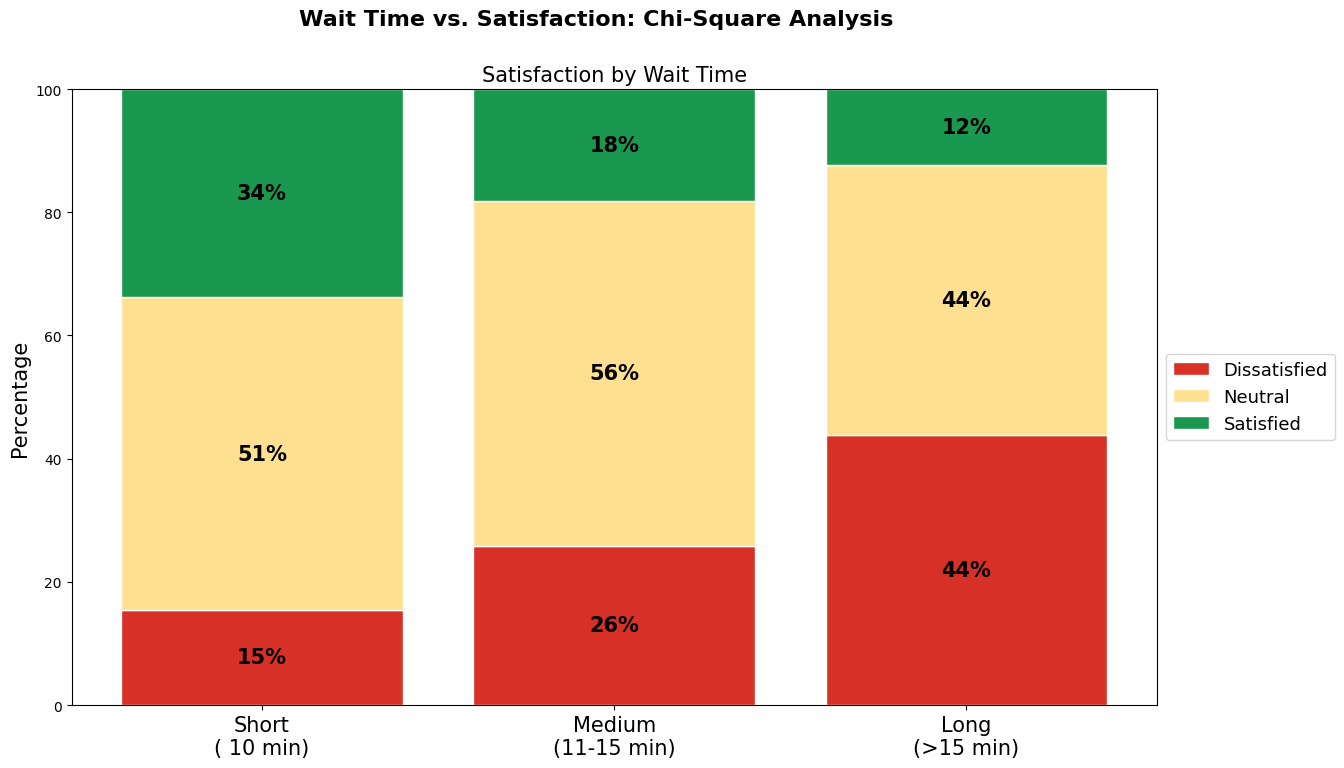

In [5]:

# ============================================================
# VISUALIZATION
# ============================================================
fig, ax1 = plt.subplots(figsize=(14, 8))
fig.suptitle('Wait Time vs. Satisfaction: Chi-Square Analysis', fontsize=16, fontweight='bold')

colors = {'Dissatisfied': '#d73027', 'Neutral': '#fee090', 'Satisfied': '#1a9850'}

x = np.arange(len(wait_order))
bottom = np.zeros(len(wait_order))
for sat in sat_order:
    values = row_pct[sat].values
    ax1.bar(x, values, 0.8, bottom=bottom, label=sat, color=colors[sat], edgecolor='white')
    for i, (v, b) in enumerate(zip(values, bottom)):
        if v > 10:
            ax1.text(i, b + v/2, f'{v:.0f}%', ha='center', va='center', fontweight='bold', fontsize=15)
    bottom += values

ax1.set_ylabel('Percentage', fontsize=15)
ax1.set_title('Satisfaction by Wait Time', fontsize=15)
ax1.set_xticks(x)
ax1.set_xticklabels(['Short\n( 10 min)', 'Medium\n(11-15 min)', 'Long\n(>15 min)'], fontsize=15)
# Замените строку с ax1.legend на:
ax1.legend(fontsize=13, loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_ylim(0, 100)


plt.show()
